# Summary of the assignments
<p> Assignment #1: Dataset: catvnoncat - Comparison of conventional ANN with Convolutional NN (CNN)</p>
<p> Assignment #2: Dataset: fashion MNIST - Comparison of conventional ANN with Convolutional NN (CNN)</p>
<p> Assignment #3: Dataset: cifar10 - Implementation of keras tuner with Convolutional NN (CNN) </p>
<p> Assignment #4: Dataset: cifar10 - Implementation of AlexNet Architecture </p>

# Assignment #1: Dataset: catvnoncat - Comparison of conventional ANN with Convolutional NN (CNN)

# Running with the conventional ANN

In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from utils import dataset_loader
import pandas as pd

# Set seed for reproducibility
seed = 1404
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.config.experimental.enable_op_determinism()

X_train_all,y_train_all,X_test,y_test = dataset_loader('./')

X_train,y_train = X_train_all[:-50],y_train_all[:-50]
X_valid,y_valid = X_train_all[-50:],y_train_all[-50:]

In [ ]:
input_shape=X_train.shape[1:]
input_shape

(64, 64, 3)

In [ ]:
X_train_scaled=X_train/255
X_valid_scaled=X_valid/255
X_test_scaled=X_test/255

In [ ]:
model=Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(50,activation='relu'),
    Dense(50,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_data=(X_valid_scaled,y_valid))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.4751 - loss: 1.1338 - val_accuracy: 0.6800 - val_loss: 0.6998
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6225 - loss: 0.6600 - val_accuracy: 0.6400 - val_loss: 0.6687
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7077 - loss: 0.5693 - val_accuracy: 0.6000 - val_loss: 0.6787
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6761 - loss: 0.5638 - val_accuracy: 0.5800 - val_loss: 0.6489
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7120 - loss: 0.5811 - val_accuracy: 0.5200 - val_loss: 0.8077
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6421 - loss: 0.5964 - val_accuracy: 0.6200 - val_loss: 0.6490
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8013 - loss: 0.4922 - val_accuracy: 0.5800 - val_loss: 0.7475
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8013 - loss: 0.4564 - val_accuracy: 0.5600 - val_loss: 0.7881

<Axes: >

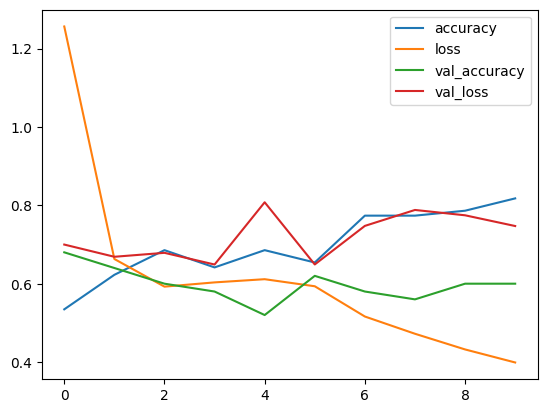

In [ ]:
df=pd.DataFrame(history.history)
df.plot()

In [ ]:
preds=model.predict(X_test)
y_pred=(preds>0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.82      0.61        17
           1       0.86      0.55      0.67        33

    accuracy                           0.64        50
   macro avg       0.67      0.68      0.64        50
weighted avg       0.73      0.64      0.65        50



# Running with the convolutional NN (CNN)

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D

model = tf.keras.Sequential([
    Input(shape=input_shape),
    Conv2D(filters=5,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(50,activation='relu'),
    Dense(50,activation='relu'),
    Dense(1,activation='sigmoid')
]
)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=8,validation_data=(X_valid_scaled,y_valid))

Epoch 1/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.8504 - loss: 0.3107 - val_accuracy: 0.7400 - val_loss: 0.6206
Epoch 2/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9252 - loss: 0.1904 - val_accuracy: 0.8000 - val_loss: 0.4770
Epoch 3/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.9332 - loss: 0.2040 - val_accuracy: 0.7400 - val_loss: 0.6506
Epoch 4/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.9420 - loss: 0.1706 - val_accuracy: 0.8400 - val_loss: 0.4467
Epoch 5/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.9420 - loss: 0.1576 - val_accuracy: 0.7600 - val_loss: 0.5019
Epoch 6/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9665 - loss: 0.1252 - val_accuracy: 0.7600 - val_loss: 0.5474
Epoch 7/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.9764 - loss: 0.0978 - val_accuracy: 0.8400 - val_loss: 0.4501
Epoch 8/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.9720 - loss: 0.0937 - val_accuracy: 0.7400 - val_loss: 0.5678


<Axes: >

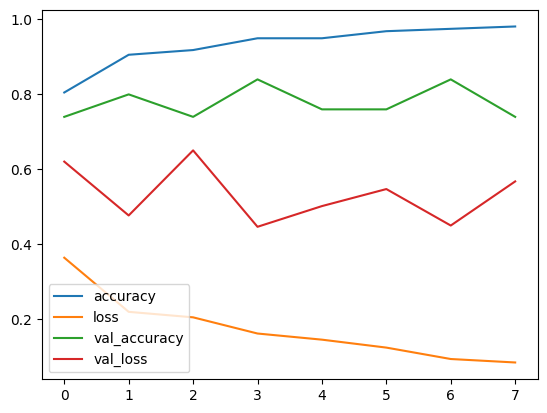

In [ ]:
df=pd.DataFrame(history.history)
df.plot()

In [ ]:
preds=model.predict(X_test)
y_pred=(preds>0.5).astype(int)
print(classification_report(y_test,y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        17
           1       1.00      0.39      0.57        33

    accuracy                           0.60        50
   macro avg       0.73      0.70      0.60        50
weighted avg       0.82      0.60      0.59        50



# Assignment #2: fashion MNIST - Comparison of conventional ANN with Convolutional NN (CNN)

# Running with the conventional ANN

In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
import pandas as pd

# Set seed for reproducibility
seed = 1404
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.config.experimental.enable_op_determinism()

In [ ]:
dataset=tf.keras.datasets.mnist.load_data()
(X_train,y_train),(X_test,y_test) = dataset

np.expand_dims(X_train,axis=-1)
X_train_scaled = np.expand_dims(X_train,axis=-1) / 255
X_test_scaled = np.expand_dims(X_test,axis=-1) / 255

input_shape=X_train_scaled.shape[1:]
input_shape

(28, 28, 1)

In [ ]:
model = tf.keras.Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
]
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8733 - loss: 0.4356 - val_accuracy: 0.9642 - val_loss: 0.1278
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9637 - loss: 0.1194 - val_accuracy: 0.9686 - val_loss: 0.1066
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9757 - loss: 0.0796 - val_accuracy: 0.9688 - val_loss: 0.1049
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9824 - loss: 0.0564 - val_accuracy: 0.9724 - val_loss: 0.0982
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9869 - loss: 0.0415 - val_accuracy: 0.9716 - val_loss: 0.1116
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9878 - loss: 0.0384 - val_accuracy: 0.9744 - val_loss: 0.1120
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9910 - loss: 0.0275 - val_accuracy: 0.9750 - val_loss: 0.1109
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9909 - loss: 0.028

<Axes: >

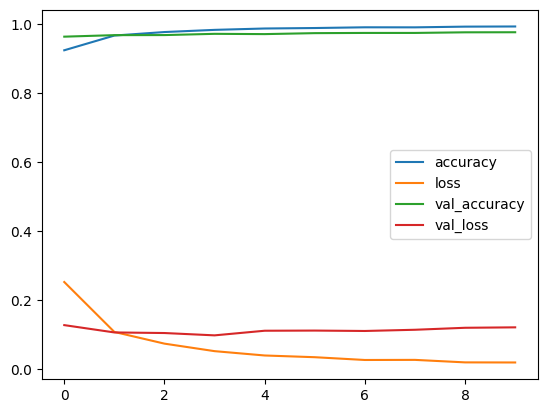

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

X_train_final = X_train_scaled[:-5000]
y_train_final = y_train[:-5000]

X_valid_final=X_train_scaled[-5000:]
y_valid_final=y_train[-5000:]

history=model.fit(X_train_final,y_train_final,epochs=10,validation_data=(X_valid_final,y_valid_final))

import pandas as pd
df=pd.DataFrame(history.history)
df.plot()

In [ ]:
prediction=model.predict(X_test)
y_pred=np.argmax(prediction,axis=-1)

print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Running with the convolutional NN (CNN)

In [ ]:
model = tf.keras.Sequential([
    Input(shape=input_shape),
    Conv2D(filters=24,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=48,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
]
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 102s 58ms/step - accuracy: 0.9082 - loss: 0.2872 - val_accuracy: 0.9802 - val_loss: 0.0736
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 92s 53ms/step - accuracy: 0.9867 - loss: 0.0447 - val_accuracy: 0.9886 - val_loss: 0.0502
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 139s 52ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.9890 - val_loss: 0.0402
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 144s 53ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9902 - val_loss: 0.0520
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 89s 52ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9878 - val_loss: 0.0499
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 143s 53ms/step - accuracy: 0.9954 - loss: 0.0125 - val_accuracy: 0.9902 - val_loss: 0.0534
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.9970 - loss: 0.0088 - val_accuracy: 0.9872 - val_loss: 0.0757
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 143s 53ms/step - accuracy: 0.

<Axes: >

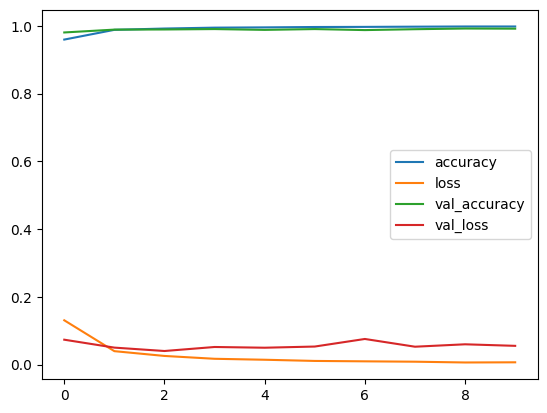

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train_final,y_train_final,epochs=10,validation_data=(X_valid_final,y_valid_final))

import pandas as pd
df=pd.DataFrame(history.history)
df.plot()

In [ ]:
prediction=model.predict(X_test)
y_pred=np.argmax(prediction,axis=-1)

print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Assignment #3: Dataset: cifar10 - Implementation of keras tuner with Convolutional NN (CNN)

#Without Keras-Tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Flatten,Dense
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Conv2D,MaxPool2D
import os
import numpy as np

seed = 1404
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.config.experimental.enable_op_determinism()

In [ ]:
cifar10 =tf.keras.datasets.cifar10.load_data()
(X_train_all,y_train_all),(X_test,y_test) = cifar10
X_train, y_train = X_train_all[:-5000], y_train_all[:-5000]
X_valid, y_valid = X_train_all[-5000:], y_train_all[-5000:]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
X_train_scaled = X_train.astype('float32') / 255.0
X_valid_scaled = X_valid.astype('float32') / 255.0
X_test_scaled  = X_test.astype('float32') / 255.0

In [ ]:
input_shape=X_train_scaled.shape[1:]
input_shape

(32, 32, 3)

In [ ]:
model = tf.keras.Sequential([
    Input(shape=input_shape),
    Conv2D(filters=24,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=48,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(700,activation='relu'),
    Dense(500,activation='relu'),
    Dense(500,activation='relu'),
    Dense(10,activation='softmax')
]
)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3981 - loss: 1.6202 - val_accuracy: 0.6286 - val_loss: 1.0679
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6539 - loss: 0.9781 - val_accuracy: 0.6616 - val_loss: 0.9816
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7582 - loss: 0.6872 - val_accuracy: 0.6560 - val_loss: 1.1282
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8349 - loss: 0.4728 - val_accuracy: 0.6702 - val_loss: 1.2332
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8929 - loss: 0.3137 - val_accuracy: 0.6686 - val_loss: 1.3734
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9301 - loss: 0.2085 - val_accuracy: 0.6500 - val_loss: 1.7847
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9473 - loss: 0.1590 - val_accuracy: 0.6666 - val_loss: 1.7467
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9597 -

<Axes: >

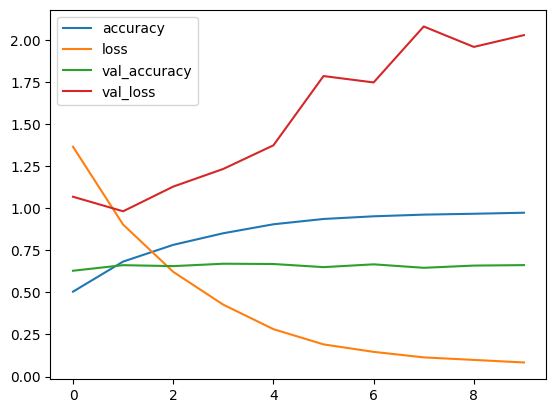

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=10,validation_data=(X_valid_scaled,y_valid))

import pandas as pd
df=pd.DataFrame(history.history)
df.plot()

In [ ]:
prediction = model.predict(X_test_scaled)
y_pred=prediction.argmax(axis=-1)

print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.65      0.73      0.69      1000
           1       0.73      0.83      0.78      1000
           2       0.53      0.52      0.52      1000
           3       0.44      0.43      0.44      1000
           4       0.56      0.60      0.58      1000
           5       0.57      0.49      0.53      1000
           6       0.73      0.70      0.71      1000
           7       0.77      0.69      0.73      1000
           8       0.73      0.78      0.75      1000
           9       0.76      0.70      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



# With Keras Tuner

In [ ]:
!pip install keras-tuner
import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
def build_model(hp):
  n_hidden=hp.Int('layers',min_value=1,max_value=3)
  n=hp.Int('units',min_value=500,max_value=700,step=100)
  af=hp.Choice('activation',['relu','sigmoid'])
  optimizer=hp.Choice('optimizer',['adam','sgd'])

  if optimizer == 'sgd':
    optimizer=keras.optimizers.SGD()
  else:
    optimizer=keras.optimizers.Adam()

  model=keras.Sequential()

  model.add(keras.layers.Conv2D(filters=24,kernel_size=(3,3),activation='relu'))
  model.add(keras.layers.Conv2D(filters=48,kernel_size=(3,3),activation='relu'))
  model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

  model.add(keras.layers.Flatten())

  for i in range(n_hidden):
    model.add(keras.layers.Dense(n,activation=af))

  model.add(keras.layers.Dense(10,activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

  return model

In [ ]:
! rm -r dl03

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='dl03',project_name='cifar10')

In [ ]:
tuner.search(X_train_scaled,y_train,epochs=5,validation_data=(X_valid_scaled,y_valid))

Trial 5 Complete [00h 01m 35s]
val_accuracy: 0.6948000192642212

Best val_accuracy So Far: 0.6948000192642212
Total elapsed time: 00h 05m 13s


In [ ]:
params=tuner.get_best_hyperparameters()[0]
params.values

{'layers': 1, 'units': 700, 'activation': 'sigmoid', 'optimizer': 'adam'}

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4403 - loss: 1.5574 - val_accuracy: 0.6320 - val_loss: 1.0353
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6573 - loss: 0.9690 - val_accuracy: 0.6874 - val_loss: 0.9038
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7379 - loss: 0.7533 - val_accuracy: 0.7008 - val_loss: 0.8998
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8311 - loss: 0.5105 - val_accuracy: 0.6828 - val_loss: 1.0493
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9157 - loss: 0.2783 - val_accuracy: 0.6840 - val_loss: 1.1300
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9588 - loss: 0.1555 - val_accuracy: 0.6996 - val_loss: 1.1361
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9751 - loss: 0.0937 - val_accuracy: 0.6986 - val_loss: 1.2321
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9867 -

<Axes: >

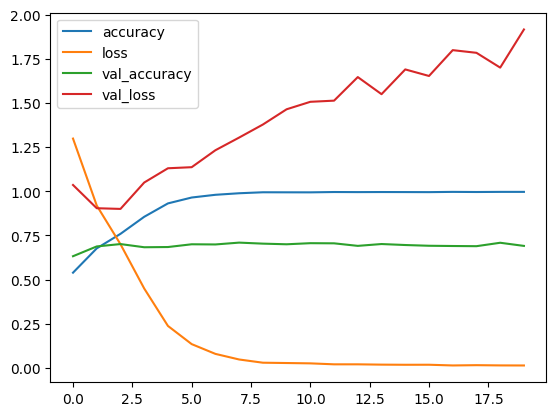

In [ ]:
model = tf.keras.Sequential([
    Input(shape=input_shape),
    Conv2D(filters=24,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=48,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(700,activation='sigmoid'),
    #Dense(500,activation='relu'),
    #Dense(500,activation='relu'),
    Dense(10,activation='softmax')
]
)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_valid_scaled,y_valid))

import pandas as pd
df=pd.DataFrame(history.history)
df.plot()

In [ ]:
prediction = model.predict(X_test_scaled)
y_pred=prediction.argmax(axis=-1)

print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.65      0.77      0.70      1000
           1       0.73      0.83      0.77      1000
           2       0.53      0.59      0.56      1000
           3       0.48      0.49      0.49      1000
           4       0.68      0.61      0.64      1000
           5       0.64      0.52      0.58      1000
           6       0.73      0.76      0.74      1000
           7       0.76      0.70      0.73      1000
           8       0.82      0.73      0.77      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



# Assignment #4: Dataset: cifar10 - Implementation of AlexNet Architecture

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.2524 - loss: 1.9698 - val_accuracy: 0.4180 - val_loss: 1.6205
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.4148 - loss: 1.5850 - val_accuracy: 0.4934 - val_loss: 1.4339
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.4706 - loss: 1.4718 - val_accuracy: 0.5300 - val_loss: 1.2894
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.4933 - loss: 1.4200 - val_accuracy: 0.5228 - val_loss: 1.3293
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 46ms/step - accuracy: 0.5105 - loss: 1.3739 - val_accuracy: 0.5630 - val_loss: 1.2476
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.5235 - loss: 1.3398 - val_accuracy: 0.5434 - val_loss: 1.3155
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.5274 - loss: 1.3205 - val_accuracy: 0.5704 - val_loss: 1.2327
Epoch 8/10
1407/1407 ━━

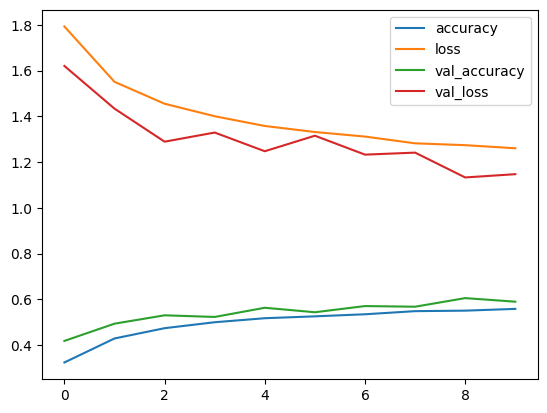

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Input,Flatten,Dense
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Conv2D,MaxPool2D
import os
import numpy as np

seed = 1404
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.config.experimental.enable_op_determinism()

cifar10 =tf.keras.datasets.cifar10.load_data()
(X_train_all,y_train_all),(X_test,y_test) = cifar10
X_train, y_train = X_train_all[:-5000], y_train_all[:-5000]
X_valid, y_valid = X_train_all[-5000:], y_train_all[-5000:]

X_train_scaled = X_train.astype('float32') / 255.0
X_valid_scaled = X_valid.astype('float32') / 255.0
X_test_scaled  = X_test.astype('float32') / 255.0

input_shape=X_train_scaled.shape[1:]
input_shape

mean = np.mean(X_train_scaled, axis=(0, 1, 2))

# AlexNet architecture
model = Sequential([
    # Input and normalization
    layers.Input(shape=(32, 32, 3)),
    layers.Lambda(lambda x: x - mean),  # Mean subtraction

    # Data augmentation
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    # Block 1
    layers.Conv2D(96, (5, 5), strides=1, padding='same', activation='relu'),
    layers.Lambda(lambda x: tf.nn.local_response_normalization(
        x, depth_radius=5, bias=1, alpha=0.0001, beta=0.75)),
    layers.MaxPool2D(pool_size=(3, 3), strides=2),

    # Block 2
    layers.Conv2D(256, (5, 5), strides=1, padding='same', activation='relu'),
    layers.Lambda(lambda x: tf.nn.local_response_normalization(
        x, depth_radius=5, bias=1, alpha=0.0001, beta=0.75)),
    layers.MaxPool2D(pool_size=(3, 3), strides=2),

    # Block 3
    layers.Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'),

    # Block 4
    layers.Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'),

    # Block 5
    layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3, 3), strides=2),

    # Classifier
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=10,validation_data=(X_valid_scaled,y_valid))

import pandas as pd
df=pd.DataFrame(history.history)
df.plot()

prediction = model.predict(X_test_scaled)
y_pred=prediction.argmax(axis=-1)

print(classification_report(y_test,y_pred))
